<a href="https://colab.research.google.com/github/MassiveTortoise/Colab/blob/main/Hypothesis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis 1:

---

### Research Question 1: How does the duration of a track affect its popularity?

H₀: There is no significant difference in popularity between tracks of different lengths (short, moderate, and long).

H₁: Tracks with moderate length (3 to 4 minutes) are more popular than shorter or longer tracks.



In [ ]:
import requests
import json
import base64
import pandas as pd

# Spotify API credentials
client_id = "2d02d7c8944944e6b7691f8701f1a544"
client_secret = "7dd327cbb1744d96bf735e3758b790ee"

# Function to get the access token
def get_access_token():
    url = "https://accounts.spotify.com/api/token"
    headers = {
        "Authorization": f"Basic {base64.b64encode(f'{client_id}:{client_secret}'.encode()).decode()}"
    }
    data = {"grant_type": "client_credentials"}
    response = requests.post(url, headers=headers, data=data)
    return response.json().get("access_token")



In [ ]:
access_token = get_access_token()

# Print the access token to see it
print("Access Token:", access_token)

Access Token: BQAw9AXhSFhzIhyFyRMcbZk-vAn8NZm5_mPzZeWlwtsNal0GNXqSw7cTBUut6ZZelPftoSHdBWYCWA-z3JploKhvUgRuDrj72HjcIsP5ks9wiz5paac


In [ ]:
import requests
import pandas as pd
import base64

def get_access_token():
    client_id = '2d02d7c8944944e6b7691f8701f1a544'  # Replace with your client ID
    client_secret = '7dd327cbb1744d96bf735e3758b790ee'  # Replace with your client secret

    # Prepare the request
    url = "https://accounts.spotify.com/api/token"
    headers = {
        "Authorization": "Basic " + base64.b64encode(f"{client_id}:{client_secret}".encode()).decode(),
        "Content-Type": "application/x-www-form-urlencoded"
    }
    data = {
        "grant_type": "client_credentials"
    }

    # Make the request
    response = requests.post(url, headers=headers, data=data)

    if response.ok:
        access_token = response.json().get("access_token")
        return access_token
    else:
        print(f"Error: {response.status_code} - {response.text}")
        return None

In [ ]:
def search_all_artists(limit=50):
    access_token = get_access_token()
    if not access_token:
        print("Failed to obtain access token.")
        return []

    all_artists = []

    for letter in range(65, 91):  # ASCII values for A-Z
        query = chr(letter)  # Convert ASCII value to character
        url = f"https://api.spotify.com/v1/search?q={query}&type=artist&limit={limit}"
        offset = 0  # Start with the first page

        while True:
            response = requests.get(url + f"&offset={offset}", headers={"Authorization": f"Bearer {access_token}"})

            if response.ok:
                data = response.json()
                artists = data.get("artists", {}).get("items", [])
                all_artists.extend(artists)

                total = data['artists']['total']
                if offset + limit >= total:  # If we've fetched all artists for this letter
                    break

                offset += limit
            else:
                print(f"Error: {response.status_code} - {response.text}")
                break

    return all_artists

In [ ]:
artists = search_all_artists()
artist_df = pd.DataFrame(artists).fillna("N/A")
artist_df['followers'] = artist_df['followers'].apply(lambda x: x['total'])
artist_df = artist_df.drop_duplicates(subset='name')
thedf = artist_df[['id', 'name', 'genres', 'popularity', 'followers']]
thedf

,id,name,genres,popularity,followers
0,6s22t5Y3prQHyaHWUN1R1C,AJR,[pov: indie],73,3460480
1,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,[pop],92,100291604
2,0urTpYCsixqZwgNTkPJOJ4,Aaliyah,"[contemporary r&b, dance pop, hip pop, r&b, ur...",69,4548436
3,13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,"[east coast hip hop, hip hop, rap]",86,15065573
4,711MCceyCBcFnzjGY4Q7Un,AC/DC,"[australian rock, hard rock, rock]",84,29544827
...,...,...,...,...,...
25995,1kqmfPNXoed2ueFvyMfNP7,Z Berg,[],34,10241
25996,1p8mNyT18G4coJooY8NTGN,金志文,"[chinese singer-songwriter, mainland chinese pop]",39,31167
25997,1rXR5cwxxippMLTtaeAa6y,Leo Zimmerman,[calming instrumental],50,270
25998,7DHVVPqZYKCrro216FSMzq,Zarech,[],31,1437


In [ ]:
thedf.to_csv('artists.csv', index=False)
artists = pd.read_csv('artists.csv')
artists


,id,name,genres,popularity,followers
0,6s22t5Y3prQHyaHWUN1R1C,AJR,['pov: indie'],73,3460480
1,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,['pop'],92,100291604
2,0urTpYCsixqZwgNTkPJOJ4,Aaliyah,"['contemporary r&b', 'dance pop', 'hip pop', '...",69,4548436
3,13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,"['east coast hip hop', 'hip hop', 'rap']",86,15065573
4,711MCceyCBcFnzjGY4Q7Un,AC/DC,"['australian rock', 'hard rock', 'rock']",84,29544827
...,...,...,...,...,...
19058,1kqmfPNXoed2ueFvyMfNP7,Z Berg,[],34,10241
19059,1p8mNyT18G4coJooY8NTGN,金志文,"['chinese singer-songwriter', 'mainland chines...",39,31167
19060,1rXR5cwxxippMLTtaeAa6y,Leo Zimmerman,['calming instrumental'],50,270
19061,7DHVVPqZYKCrro216FSMzq,Zarech,[],31,1437


In [ ]:
import time
import pandas as pd

def create_dataframe(artists, max_artists=1000):  # Add max_artists parameter
    df_list = []
    count = 0
    for i in range(min(max_artists, len(artists))):  # Iterate through rows
        artist = artists.iloc[i]  # Access row data using iloc
        artist_id = artist['id']
        artist_name = artist['name']
        # Retrieve top tracks for the artist
        top_tracks = get_artist_top_tracks(artist_id)
        time.sleep(1)  # Wait 1 second before fetching top tracks
        if top_tracks:
            for track in top_tracks[:10]:
                track_data = {
                    "track_id": track['id'],
                    "artist_id": artist_id,
                    "track_name": track['name'],
                    "artist_name": artist_name,
                    "duration_ms": track['duration_ms'],
                    "popularity": track['popularity']
                }
                df_list.append(track_data)
                count += 1
                if count % 50 == 0:
                    time.sleep(1)  # Wait an extra second after every 50 tracks

    return pd.DataFrame(df_list)


# Process up to 1000 artists to potentially get 10000 entries
df = create_dataframe(artists, max_artists=1000)
df

                    track_id               artist_id               track_name  \
0     2GujK1FWxxOZ118PaWNgbZ  6s22t5Y3prQHyaHWUN1R1C  World's Smallest Violin   
1     4SQLQfcR0vhyIN4uPBlc0d  6s22t5Y3prQHyaHWUN1R1C                    Bang!   
2     2QKLrgXNQtK2c8QbLRO3XC  6s22t5Y3prQHyaHWUN1R1C      Burn The House Down   
3     2sVcBaVtBPM9vIFk1Jnbw8  6s22t5Y3prQHyaHWUN1R1C                     Weak   
4     3LDNcikQd7Zui9gJCISTtR  6s22t5Y3prQHyaHWUN1R1C           Yes I'm A Mess   
...                      ...                     ...                      ...   
9776  2AY1UAimvTqjJC8vDJsOyy  4obzFoKoKRHIphyHzJ35G3                  Mayores   
9777  62vDrkBEyJYEOFj1ScBqM7  4obzFoKoKRHIphyHzJ35G3               Sin Pijama   
9778  0pkiYzXyU58nKV74xsAuwW  4obzFoKoKRHIphyHzJ35G3                 MERCEDES   
9779  7dNwJbsT0sg1le5kVugGJb  4obzFoKoKRHIphyHzJ35G3                   Bubalu   
9780  3PlDxLEkLlW2dbz8EEC2Qv  4obzFoKoKRHIphyHzJ35G3                    Cough   

     artist_name  duration_

In [ ]:
df.to_csv('artist_tracks.csv', index=False)

# ANOVA Test:

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('artist_tracks_1k.csv')

df['duration_min'] = df['duration_ms'] / 60000  # Convert milliseconds to minutes

def categorize_length(duration):
    if duration < 3:
        return 'Short'
    elif 3 <= duration <= 4:
        return 'Moderate'
    else:
        return 'Long'

df['length_category'] = df['duration_min'].apply(categorize_length)


# Since we have more than two groups, we'll use a one-way ANOVA test to determine if there's a statistically significant difference in popularity among the three categories.

# Extract popularity scores for each group
popularity_short = df[df['length_category'] == 'Short']['popularity'].dropna()
popularity_moderate = df[df['length_category'] == 'Moderate']['popularity'].dropna()
popularity_long = df[df['length_category'] == 'Long']['popularity'].dropna()

# Perform ANOVA test
f_stat, p_value = f_oneway(popularity_short, popularity_moderate, popularity_long)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")


F-statistic: 1.0128338627951912
P-value: 0.36357008956578263


## The p-value is greater than 0.05. **We fail to reject the null hypothesis H₀​.**

### This means there's no statistically significant difference in popularity between tracks of different lengths based on this sample.

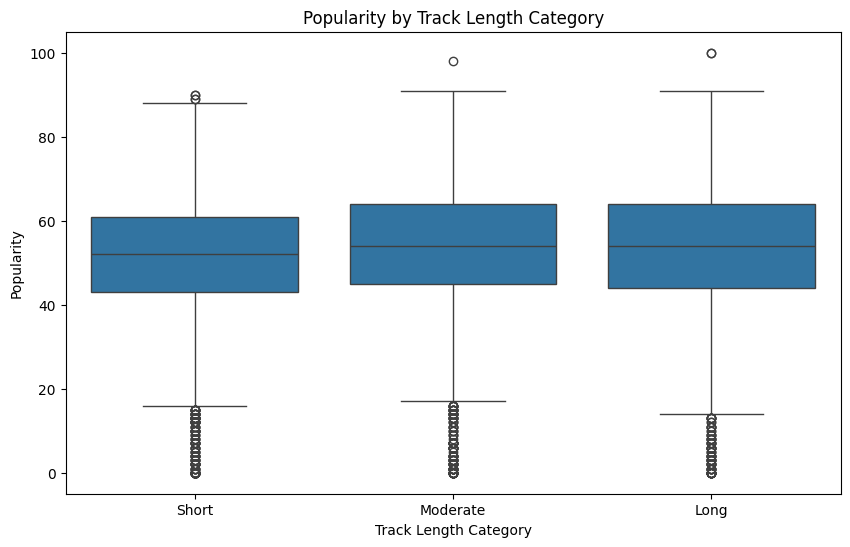

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='length_category', y='popularity', data=df, order=['Short', 'Moderate', 'Long'])
plt.title('Popularity by Track Length Category')
plt.xlabel('Track Length Category')
plt.ylabel('Popularity')
plt.show()


### Boxplot:
The median popularity score for all track length categories (short, moderate, and long) is quite similar, around 55 to 60.

All three categories contain a few outliers above the 80th percentile, indicating that some tracks achieve a high popularity score, regardless of length.

The lower and upper whiskers show that the popularity distribution spans a wide range in each category, with minimum values close to 0 and maximum values near 100. The range of popularity is similar for all track lengths.

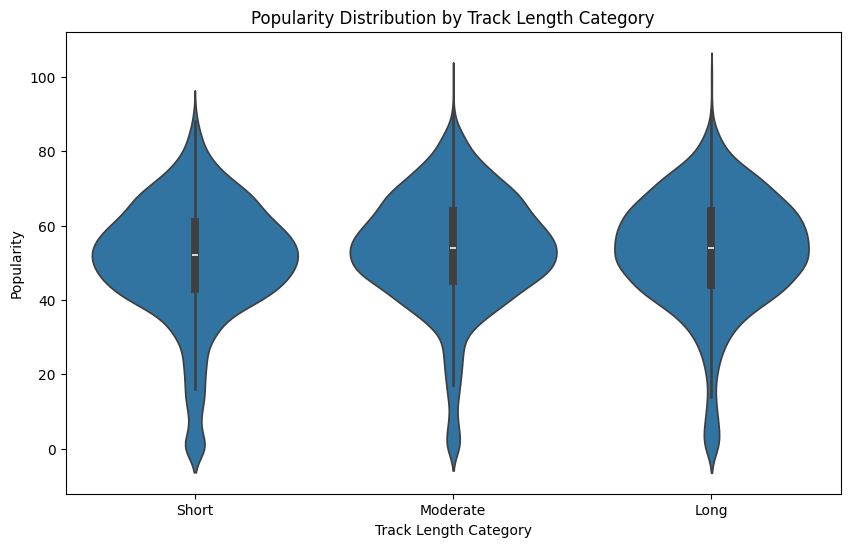

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='length_category', y='popularity', data=df, order=['Short', 'Moderate', 'Long'])
plt.title('Popularity Distribution by Track Length Category')
plt.xlabel('Track Length Category')
plt.ylabel('Popularity')
plt.show()


### Violin Plot:
All three track length categories have a similar shape and a concentration of tracks with popularity scores around 45 to 55.

The median popularity is approximately the same for all categories, slightly above 50, and there are no significant visible differences in terms of central tendency between short, moderate, and long tracks.


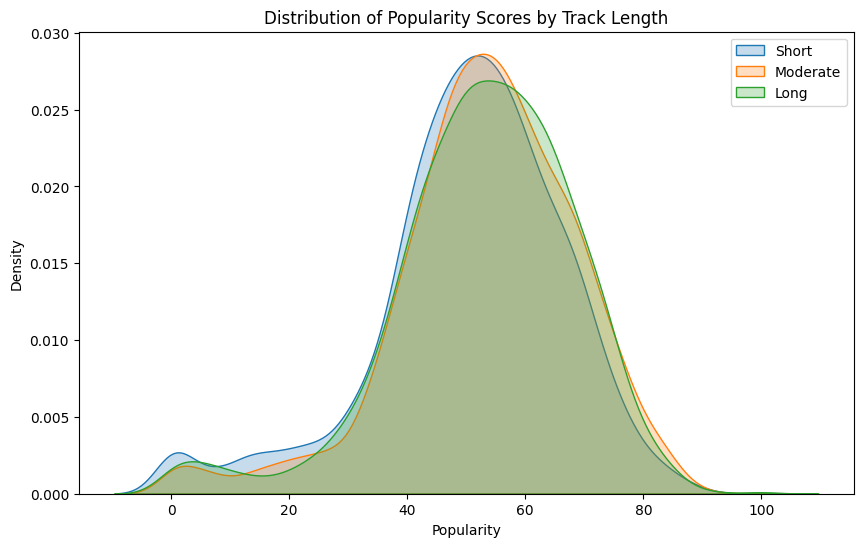

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(popularity_short, fill=True, label='Short')
sns.kdeplot(popularity_moderate, fill=True, label='Moderate')
sns.kdeplot(popularity_long, fill=True, label='Long')
plt.title('Distribution of Popularity Scores by Track Length')
plt.xlabel('Popularity')
plt.legend()
plt.show()


### Density Plot:
The peaks for all categories occur in the 50-60 popularity range, with moderate-length tracks showing a very slight shift toward the higher popularity range compared to the short and long tracks.

The curves largely overlap, indicating minimal differences between the distributions.
